# Описание проекта 

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Цель исследования:
   
Целью проекта является выявление закономерностей, определяющих успешность компьютерных игр, на основе анализа исторических данных о продажах, оценок пользователей и экспертов, жанров и платформ. Это позволит интернет-магазину «Стримчик» предсказать потенциально популярные продукты и эффективно спланировать рекламные кампании на 2017 год.

# Ход исследования:
1. Сбор и предварительная обработка данных.
2. Анализ данных.
3. Выявление закономерностей успешности игр.
4. Разработка рекомендаций для рекламной кампании.
5. Визуализация и отчетность.
6. Планирование и реализация.

# Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг   компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [1]:
!pip install missingno

In [1]:
# импорт библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
from scipy.stats import binom, norm
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
import re
import warnings
warnings.filterwarnings("ignore")

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
# чтение файла с данными

games_df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
# получение первых 5 строк таблицы data
games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# получение общей информации о данных в таблице data
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Отобразим уникальные значения по каждому столбцу.
for column in games_df.columns:
    print(column)
    print(games_df[column].unique())
    print()

Name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']

Platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

Year_of_Release
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]

Genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

NA_sales
[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+00 9.430e+00 1.278e+01 4.740e+00 6.380e+00
 1.083e+01 9.540e+00 9.660e+00 8.410e+00 6.06

<b>Вывод</b>

Выделение типов переменных в games_df:

- Категориальные: Name, Platform, Genre, Rating.
- Количественные: Year_of_Release, NA_sales, EU_sales, JP_sales, Critic_Score, User_Score.

# Шаг 2. Подготовьте данные

#### 2.1 Замените названия столбцов (приведите к нижнему регистру);

In [6]:
# переименование столбцов
games_df = games_df.rename(columns={'Name':'name','Platform':'platform','Year_of_Release':'year_of_release','Genre':'genre','NA_sales':'na_sales','EU_sales':'eu_sales','JP_sales':'jp_sales','Other_sales':'other_sales','Critic_Score':'critic_score','User_Score':'user_score','Rating':'rating'})

#### 2.2 Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [7]:
games_df['year_of_release'] = games_df['year_of_release'].astype('Int64') 
games_df['critic_score'] = games_df['critic_score'].astype('float')  


In [8]:
# в столбец user_score строковое значение "tbd" заменил на NaN чтобы изменить тип данных
games_df['user_score'] = games_df['user_score'].replace('tbd', np.nan)
games_df['user_score'] = games_df['user_score'].astype('float')  

- year_of_release тип данных заменили на  int потому что год выпуска целое число.
- Столбцы user_score и critic_score имеется дробные числа поэтому заменили на тип данных float.
- Остальное столбцы без изменений так как соответствует тип данных.

#### 2.3 Обработайте пропуски при необходимости:

- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;

- Опишите причины, которые могли привести к пропускам;

- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

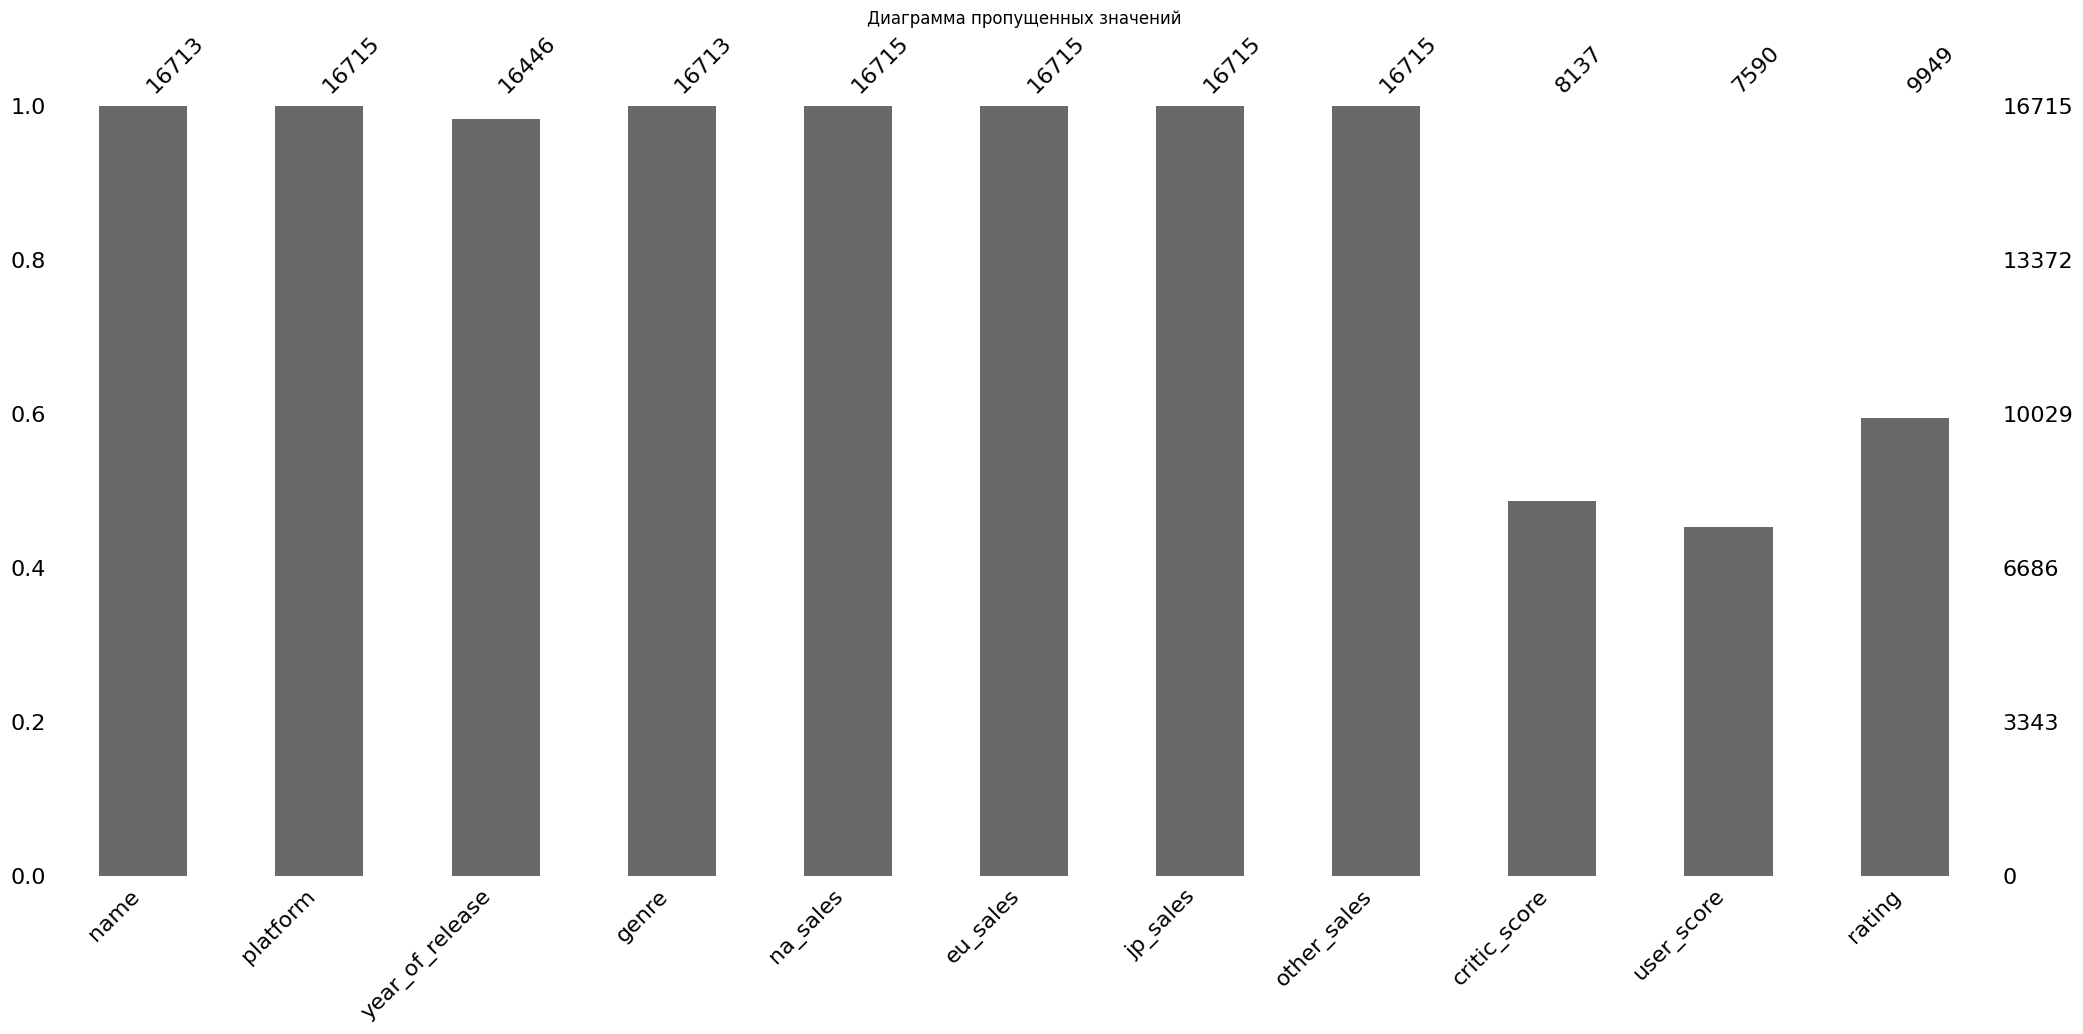

In [9]:
plt.figure(figsize=(10, 6))
msno.bar(games_df)
plt.title('Диаграмма пропущенных значений')
plt.show()

In [10]:
#количество пропущенных значений для каждого столбца
games_df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Число пропущенных значений для столбцы name и genre по 2. Посмотрим на данные.

In [11]:
games_df[games_df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
games_df[games_df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Так как  столбцы name и genre у обоих пропущенных значений только на строках 659 и 14244. Можем эти строки удалить

In [13]:

games_df.drop([659, 14244],inplace=True)

In [14]:
games_df[games_df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
games_df[games_df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Столбцы user_score и critic_score очень много пропущенных значений. Их нельзя заполнить средним или медианным значением. Потому что разные факторы влияют на оценку ползователей. Лучьше их так оставим.

In [16]:
games_df[games_df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


У нас всего 1,6% пропусков года релиза. Лучьше  удалим пропуски.

In [17]:
games_df=games_df.dropna(subset=['year_of_release'])

In [18]:
games_df[games_df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Заполним пропуски   с заглушкой типа 'unknown'

In [20]:
# подсчёт явных дубликатов 
games_df.duplicated().sum()

0

In [21]:
# просмотр уникальных отсортированных названий имена ,жанр и платформ
print(games_df['name'].sort_values().unique())
print(games_df['platform'].sort_values().unique())
print(games_df['genre'].sort_values().unique())

[' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']
['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']


In [22]:
# Проверять неявных дубликатов по имени, платформе и году релиза
games_df['is_duplicated'] = games_df.duplicated(subset=['name','platform','year_of_release'])

In [23]:
# просмотр уникальных значений
games_df['is_duplicated'].value_counts()

is_duplicated
False    16443
True         1
Name: count, dtype: int64

In [24]:
# удалим где есть значение True 
games_df=games_df[games_df['is_duplicated']!=True]

In [25]:
# удалим столбец is_duplicated
games_df = games_df.drop(['is_duplicated'],axis=1)

*Опишите причины, которые могли привести к пропускам:* 
- Человеческий фактор: при ввода или сбора данных.
- Отсутствия данных. 
- Несоответствия формата данных или потеря данных при переносе на другое система.
- Невозможность получить доступа для данных.

#### 2.4 Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [26]:
games_df['total_sales'] = games_df.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


<b>Вывод</b>

При подготовке данных:

- Заменили названия столбцов.
- Преобразовали данные в нужные типы.
- Обработали пропуски при необходимости.Удалили где данных не надо. 
- Проверили на наличие дубликаты.
- Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

In [27]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = games_df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name :

# Шаг 3. Проведите исследовательский анализ данных

#### 3.1 Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [28]:
#количества игр, выпущенных в каждый год
games_per_year = games_df['year_of_release'].value_counts().sort_index()


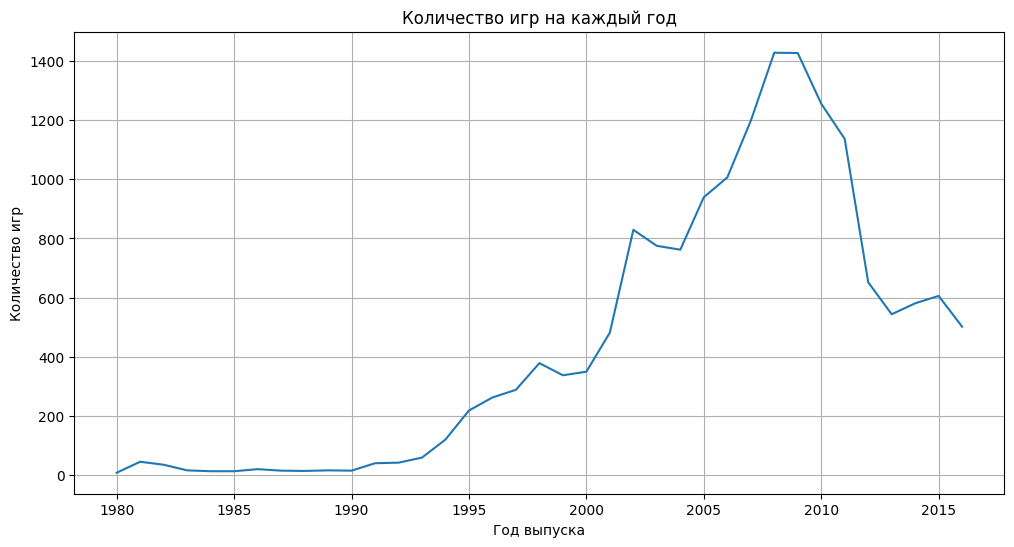

In [29]:
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='line',grid=True)
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Количество игр на каждый год')
plt.show()

<b>Вывод</b>

Данные на весь период не нужны. С 1980-х годах до 1990-х годах  изменений почти нет. Наибольшее количество игр выпускалось в период с 2002 по 2015 годы. С 2013 по 2016 годы наблюдается стабильно высокий уровень выпуска игр, с небольшим снижением в 2016 году. Это может свидетельствовать о насыщении рынка или изменении стратегии выпуска.

#### 3.2 Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [30]:
# Суммируем продажи по платформам
platform_sales = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

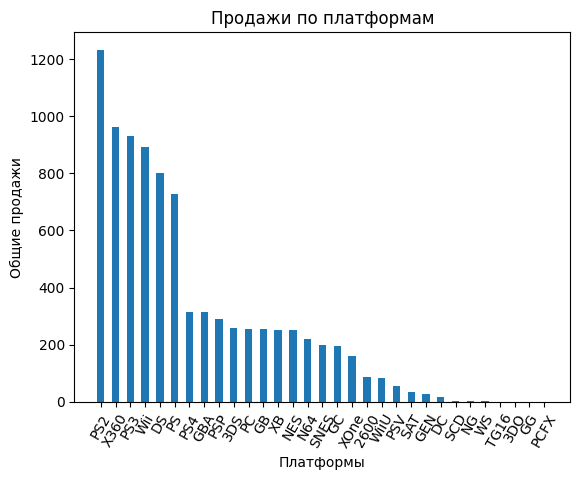

In [31]:
#plt.figure(figsize=(12, 6))
plt.bar(platform_sales.index,platform_sales,width=0.5)
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.xticks(rotation=60)
plt.title('Продажи по платформам')
plt.show()

In [32]:
# Выбираем топ-5 платформ с наибольшими продажами
top_platforms = platform_sales.head(5).index
print(top_platforms)

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')


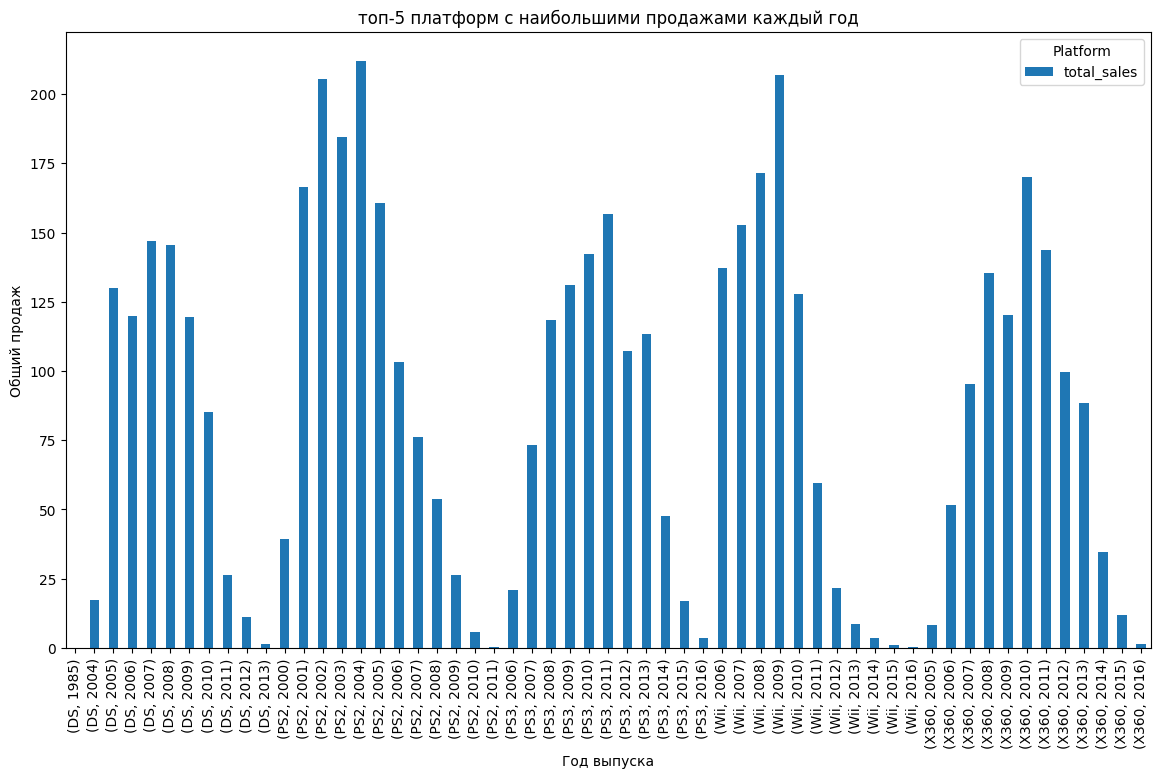

In [33]:
# Фильтрация данных по топ-5 платформам
top_platform_data = games_df[games_df['platform'].isin(top_platforms)]

# Группировка данных по платформам и годам
sales_per_year = pd.pivot_table(top_platform_data, index=['platform','year_of_release'], values='total_sales', aggfunc='sum')


sales_per_year.plot(kind='bar', figsize=(14, 8))
plt.xlabel('Год выпуска')
plt.ylabel('Общий продаж')
plt.title('топ-5 платформ с наибольшими продажами каждый год')
plt.legend(title='Platform')
plt.show()

In [34]:
# Анализ сроков существования платформ
platform_life = games_df.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_life['life'] = platform_life['max'] - platform_life['min']+1

print(platform_life)

           min   max  life
platform                  
2600      1980  1989    10
3DO       1994  1995     2
3DS       2011  2016     6
DC        1998  2008    11
DS        1985  2013    29
GB        1988  2001    14
GBA       2000  2007     8
GC        2001  2007     7
GEN       1990  1994     5
GG        1992  1992     1
N64       1996  2002     7
NES       1983  1994    12
NG        1993  1996     4
PC        1985  2016    32
PCFX      1996  1996     1
PS        1994  2003    10
PS2       2000  2011    12
PS3       2006  2016    11
PS4       2013  2016     4
PSP       2004  2015    12
PSV       2011  2016     6
SAT       1994  1999     6
SCD       1993  1994     2
SNES      1990  1999    10
TG16      1995  1995     1
WS        1999  2001     3
Wii       2006  2016    11
WiiU      2012  2016     5
X360      2005  2016    12
XB        2000  2008     9
XOne      2013  2016     4


In [35]:
platform_life['life'].median()

7.0

<b>Вывод</b>

Для платформ приставок PS срок использования примерно 10-12 лет. Этих приставок пользуется с особой популярностью. Из platform_life видно:
- PS 1994-2003 10 лет.
- PS2 2000-2011 12 лет.
- PS3 2006-2016 11 лет.
- PS4 2013- ....

In [36]:
# Комментарий ревьюера
temp = games_df.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

#### 3.3 Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Проанализируем продажи по годам за последние 4 лет (2012-2016).

In [37]:
actual_games_df = games_df[(games_df['year_of_release'] >= 2012) & (games_df['year_of_release'] <= 2016)]
actual_games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


#### 3.5 Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [38]:
actutal_sales_platform = pd.pivot_table(actual_games_df, index='platform', 
                                     values='total_sales', aggfunc = 'sum').sort_values('total_sales', ascending=False)
actutal_sales_platform

,total_sales
platform,
PS4,314.14
PS3,288.78
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


<b>Вывод</b>

За последние 4 лет наиболее прибильные платформы это PS4, PS3, X360, 3DS, XOne.

#### 3.6 Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

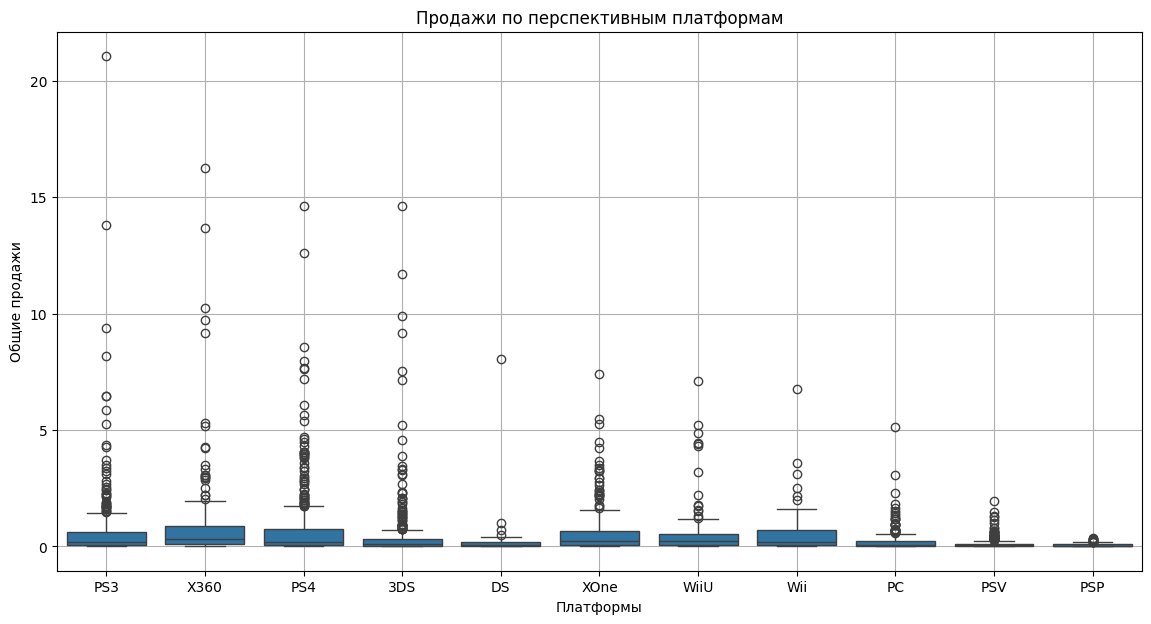

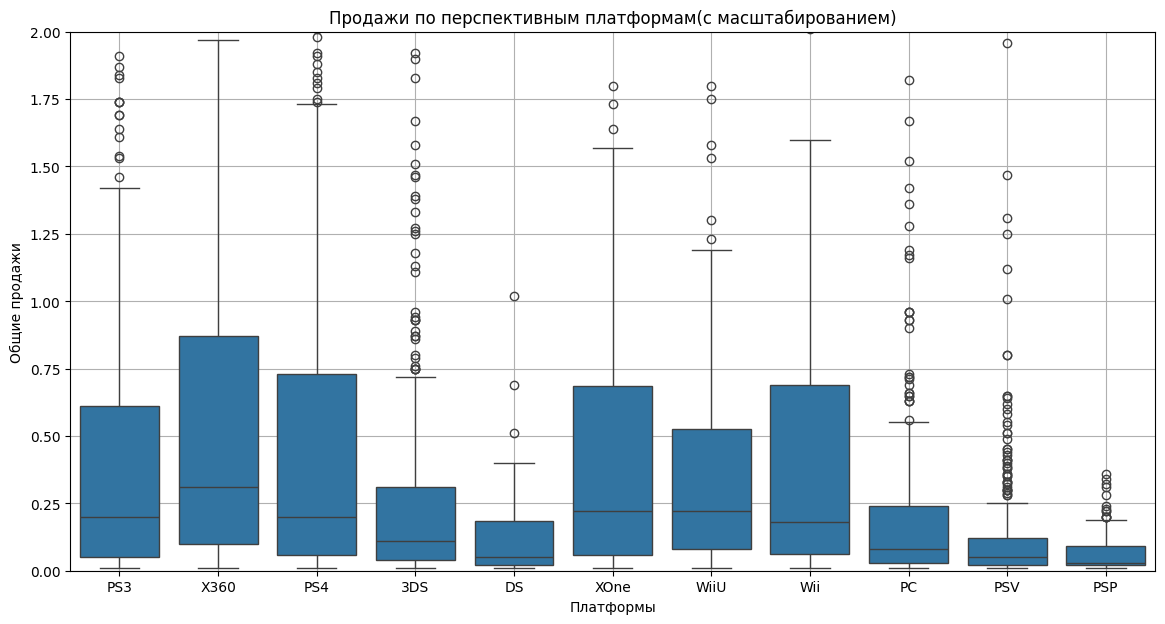

In [39]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='platform', y='total_sales', data=actual_games_df)
plt.title('Продажи по перспективным платформам')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(x='platform', y='total_sales', data=actual_games_df)
plt.ylim(0, 2)
plt.title('Продажи по перспективным платформам(с масштабированием)')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.grid(True)
plt.show()


<b>Вывод</b>

- Платформы PS4,Wii и  X360 показали наивысшие общие объемы продаж игр, что свидетельствует о их популярности и значительном жизненном цикле на рынке.
- Платформы, такие как XOne,PS3,WiiU также демонстрируют высокие объемы продаж, но заметно уступают лидерам.
- PC, DS, PSV и PSP имеют значительно более низкие объемы продаж по сравнению с топовыми платформами. Особенно выделяются PSV и PSP с наименьшими показателями.Возможно, это связано с устареванием этих платформ или их меньшей популярностью по сравнению с более новыми и мощными системами.

<font color='DarkBlue'><b>Теория</b></font><br>
<font color='DarkMagenta'>👉 Для интерпретации диаграмм размаха помогает вспомнить, что означают боксплоты. В данном случае расположение боксплота и медианы показывают у какой платформы стабильно высокие продажи. Соответственно, Стримчик должен ориентироваться на такие платформы, так как какая игра в 2017 году выстрелит не известно.</font>
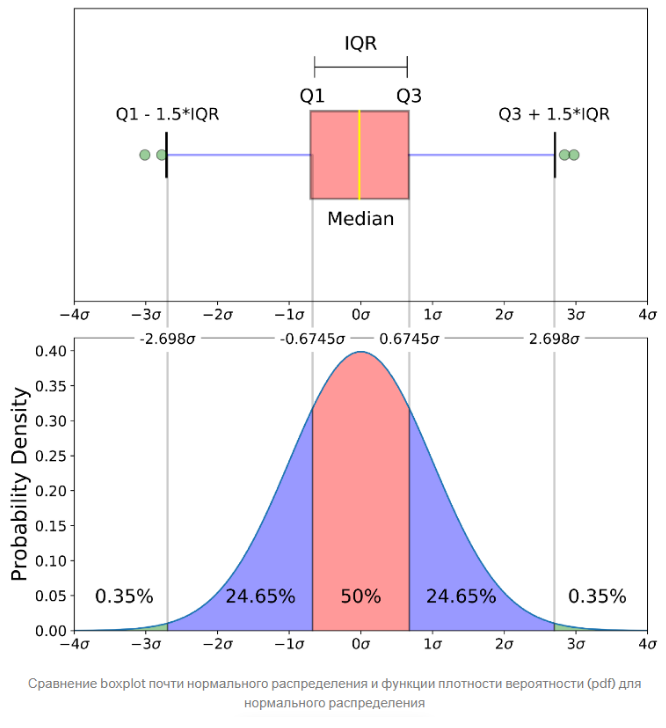

#### 3.7 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [40]:

PS4_platform=actual_games_df.query('platform == "PS4"')

In [41]:
PS4_platform_score_rating_sales=PS4_platform[['critic_score','user_score','total_sales']].dropna()
PS4_platform_score_rating_sales

,critic_score,user_score,total_sales
42,97.0,8.3,12.62
77,82.0,4.3,8.58
92,83.0,5.7,7.66
94,85.0,5.0,7.60
105,87.0,6.5,7.17
...,...,...,...
16486,42.0,2.3,0.01
16499,70.0,6.8,0.01
16500,69.0,7.5,0.01
16526,61.0,7.9,0.01


In [42]:
#корреляция
PS4_platform_score_rating_sales.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
total_sales,0.405895,-0.033625,1.000000


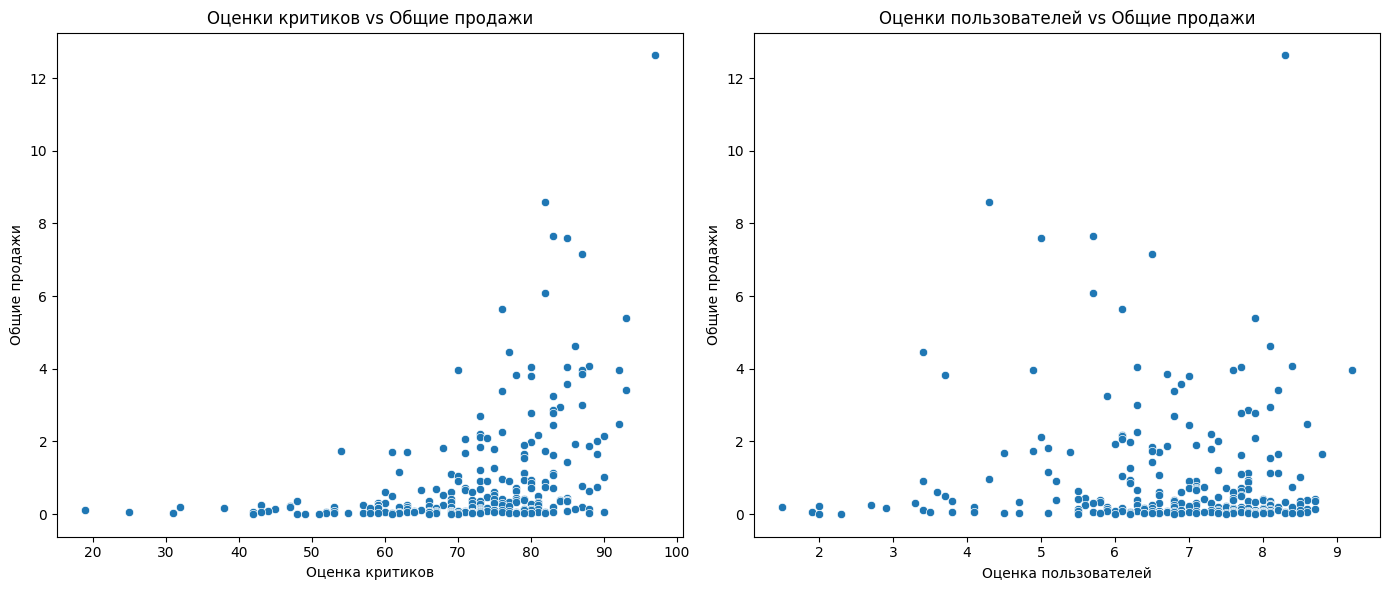

In [43]:
#диаграмма рассеяния

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=PS4_platform_score_rating_sales)
plt.title('Оценки критиков vs Общие продажи')
plt.xlabel('Оценка критиков')
plt.ylabel('Общие продажи')

plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=PS4_platform_score_rating_sales)
plt.title('Оценки пользователей vs Общие продажи')
plt.xlabel('Оценка пользователей')
plt.ylabel('Общие продажи')

plt.tight_layout()
plt.show()


<b>Вывод</b>

Корреляция между критика рейтинг и общий продаж 0.406. Из-за этого имеется в графике прямой связ. Для платформа оценка критиков важны. И ещё можно наблюдать чем выше оценка критика тем и больше оценка пользователей.  

#### 3.8 Соотнесите выводы с продажами игр на других платформах.

In [44]:
Wii_platform=actual_games_df.query('platform == "Wii"')

In [45]:
Wii_platform_score_rating_sales=Wii_platform[['critic_score','user_score','total_sales']].dropna()
Wii_platform_score_rating_sales

,critic_score,user_score,total_sales
116,74.0,7.3,6.76
439,73.0,6.8,3.13
614,78.0,7.0,2.52
2995,82.0,8.8,0.68
8965,74.0,6.0,0.14


In [46]:
#корреляция
Wii_platform_score_rating_sales.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.816295,-0.424341
user_score,0.816295,1.000000,0.009756
total_sales,-0.424341,0.009756,1.000000


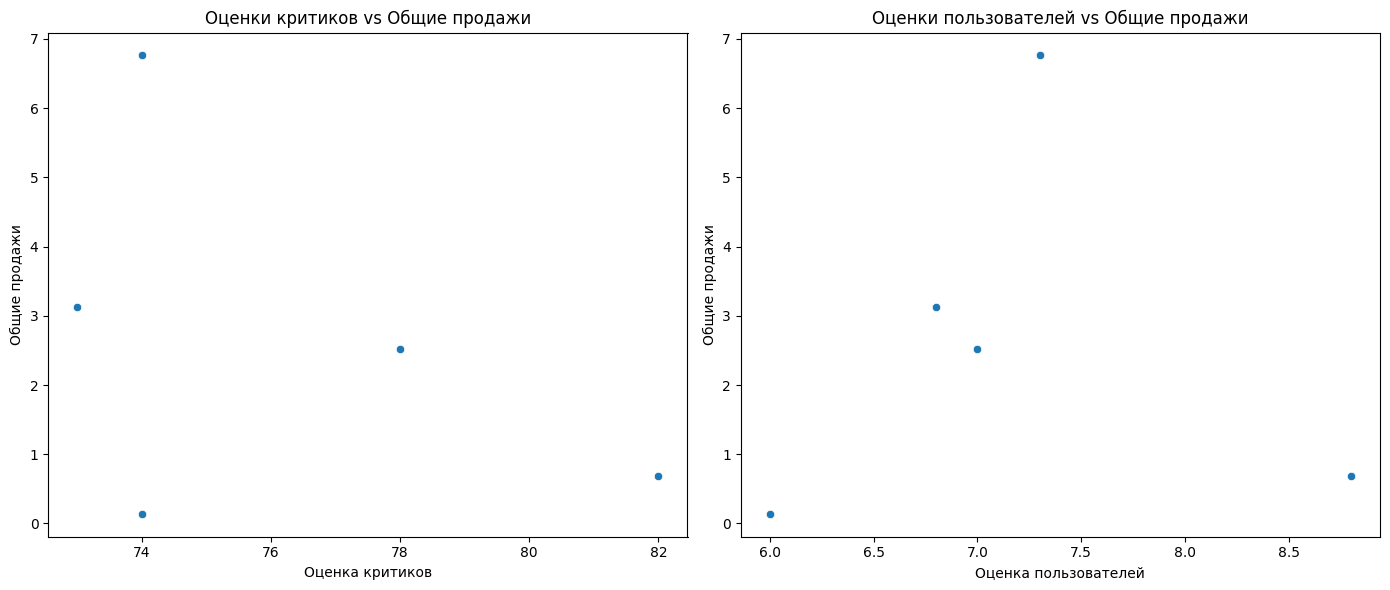

In [47]:
#диаграмма рассеяния

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=Wii_platform_score_rating_sales)
plt.title('Оценки критиков vs Общие продажи')
plt.xlabel('Оценка критиков')
plt.ylabel('Общие продажи')

plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=Wii_platform_score_rating_sales)
plt.title('Оценки пользователей vs Общие продажи')
plt.xlabel('Оценка пользователей')
plt.ylabel('Общие продажи')

plt.tight_layout()
plt.show()

In [48]:
X360_platform=actual_games_df.query('platform == "X360"')

In [49]:
X360_platform_score_rating_sales=X360_platform[['critic_score','user_score','total_sales']].dropna()
X360_platform_score_rating_sales

,critic_score,user_score,total_sales
23,97.0,8.1,16.27
35,83.0,4.8,13.68
60,73.0,2.6,10.24
66,87.0,7.0,9.71
176,84.0,6.7,5.29
...,...,...,...
13717,37.0,6.3,0.04
15074,65.0,5.3,0.03
15613,64.0,7.6,0.02
15625,62.0,7.3,0.02


In [50]:
#корреляция
X360_platform_score_rating_sales.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557352,0.360573
user_score,0.557352,1.000000,-0.002014
total_sales,0.360573,-0.002014,1.000000


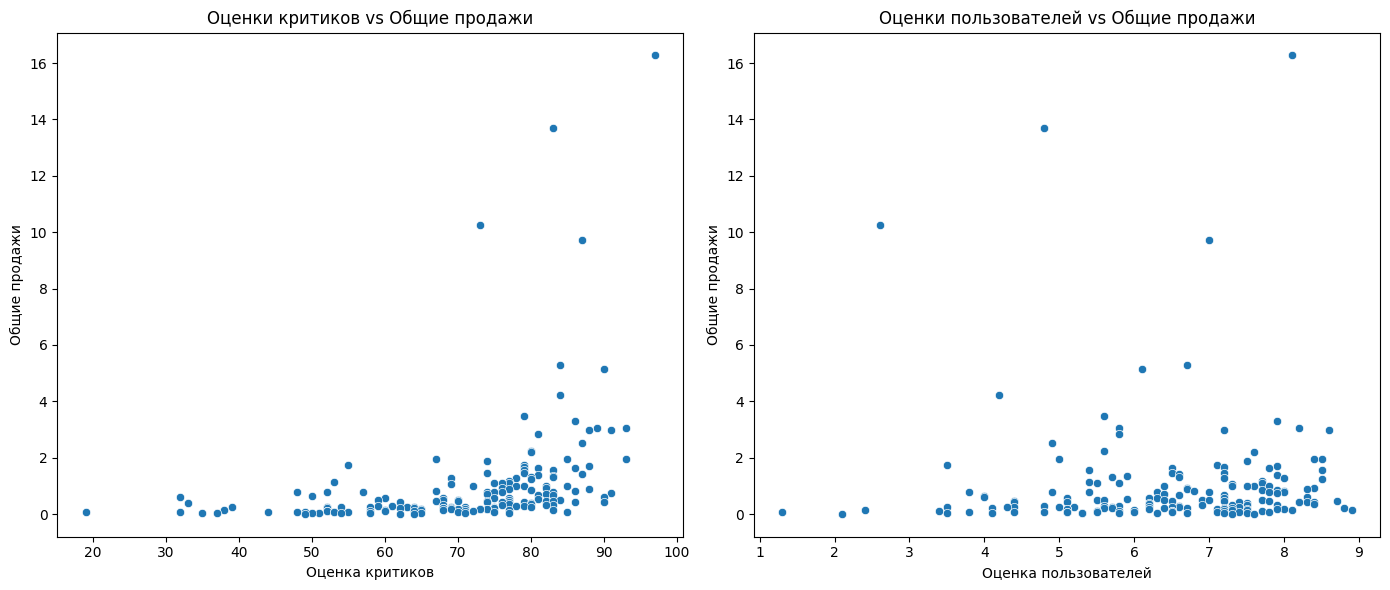

In [51]:
#диаграмма рассеяния

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=X360_platform_score_rating_sales)
plt.title('Оценки критиков vs Общие продажи')
plt.xlabel('Оценка критиков')
plt.ylabel('Общие продажи')

plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=X360_platform_score_rating_sales)
plt.title('Оценки пользователей vs Общие продажи')
plt.xlabel('Оценка пользователей')
plt.ylabel('Общие продажи')

plt.tight_layout()
plt.show()

<b>Вывод</b>

В целом платформы X360 и Wii похожи с PS4. В платформе Wii можно наблюдать сильное зависимость между оценка критиков  и оценка пользователей.  

<font color='DarkBlue'><b>Теория</b></font><br>
<font color='DarkGreen'>👌 Для оценки корреляции лучше пользоваться вот этой шкалой:</font>
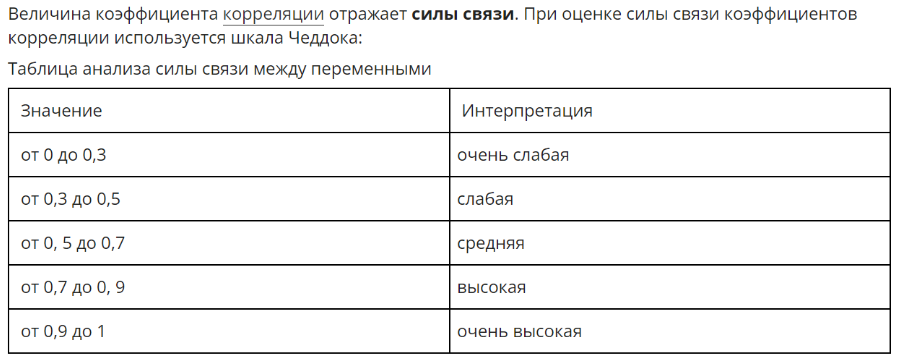

#### 3.9 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [52]:
genre_sales = actual_games_df.groupby('genre')['total_sales'].agg(['mean','median','sum']).sort_values(by='median',ascending=False)
genre_sales

,mean,median,sum
genre,,,
Shooter,1.296723,0.440,304.73
Sports,0.678127,0.240,181.06
Platform,0.717647,0.210,61.00
Role-Playing,0.521081,0.140,192.80
Racing,0.465217,0.140,53.50
Fighting,0.408165,0.130,44.49
Action,0.427856,0.120,441.12
Misc,0.442917,0.120,85.04
Simulation,0.439000,0.120,35.12


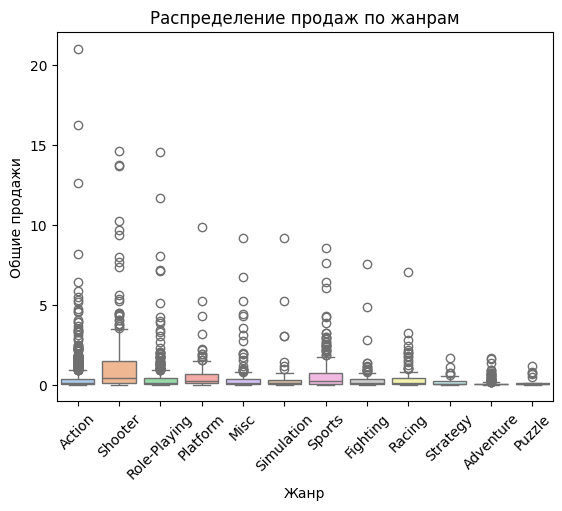

In [53]:
# Диаграммы размаха по продажам для каждого жанра
sns.boxplot(x='genre', y='total_sales', data=actual_games_df, palette='pastel')
plt.title('Распределение продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Общие продажи')
plt.xticks(rotation=45)
plt.show()

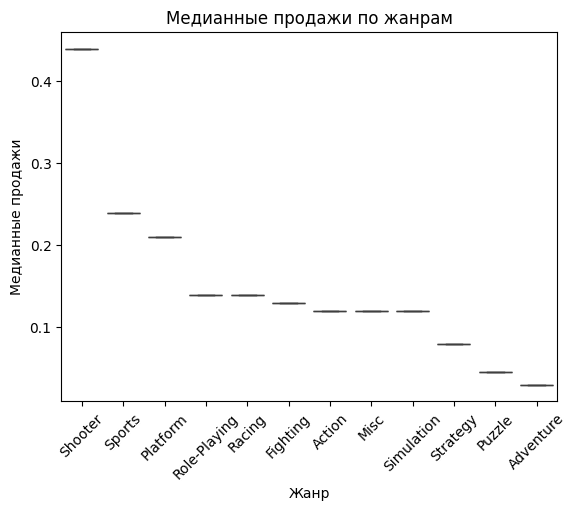

In [54]:
# График медианних продаж по жанрам
sns.boxplot(x=genre_sales.index, y=genre_sales['median'])
plt.title('Медианные продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Медианные продажи')
plt.xticks(rotation=45)
plt.show()

<b>Вывод</b>
- Shooter, Sports и Platform выделяются как наиболее устойчивые прибыльные жанры, что указывает на их  популярность и потребление.
- Strategy, Adventure и Puzzle имеют самые низкие суммарные продажи, что может говорить о меньшем интересе к этим жанрам или более узкой аудитории. Это обясняется тем что пройти игру трудно и много времени уходить на размишления.

<b>Вывод</b>

В ходе исследовательский анализ данных выявили:
- Наибольшее количество игр выпускалось в период с 2002 по 2016 годы. 
- Платформы PS4, X360, Wii являются лидерами по продажам.
- Зависимость оценок критиков и пользователей на продажи.
- Shooter, Sports и Platform выделяются как наиболее устойчивые прибыльные жанры.

# Шаг 4. Составьте портрет пользователя каждого региона

#### 4.1 Определите для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Найдем по каждому региону популярную платформу.

In [55]:
na_sales_platform = pd.pivot_table(actual_games_df, index='platform', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_sales_platform

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31
WiiU,38.10
PC,19.12
Wii,17.45
PSV,10.98


In [56]:
eu_sales_platform = pd.pivot_table(actual_games_df, index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_sales_platform

,eu_sales
platform,
PS4,141.09
PS3,106.85
X360,74.52
XOne,51.59
3DS,42.64
PC,37.76
WiiU,25.13
Wii,11.92
PSV,11.36


In [57]:
jp_sales_platform = pd.pivot_table(actual_games_df, index='platform', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_sales_platform

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01
PSP,10.47
DS,3.72
Wii,3.39
X360,1.57


In [58]:
#функция для categorize_sales
def categorize_sales(data,column, threshold=20):
    df = pd.DataFrame(data)
    sorted_data = dict(sorted(df[column].to_dict().items(), key=lambda item: item[1], reverse=True))
    labels = []
    sizes = []
    other_sales = 0

    for category, sales in sorted_data.items():
        if sales < threshold:
            other_sales += sales
        else:
            labels.append(category)
            sizes.append(sales)
    if other_sales > 0:
        labels.append('Other')
        sizes.append(other_sales)
    
    return labels, sizes

In [59]:
jp_labels, jp_sizes = categorize_sales(jp_sales_platform,column='jp_sales', threshold=10)
na_labels, na_sizes = categorize_sales(na_sales_platform,column='na_sales', threshold=50)
eu_labels, eu_sizes = categorize_sales(eu_sales_platform,column='eu_sales', threshold=40)

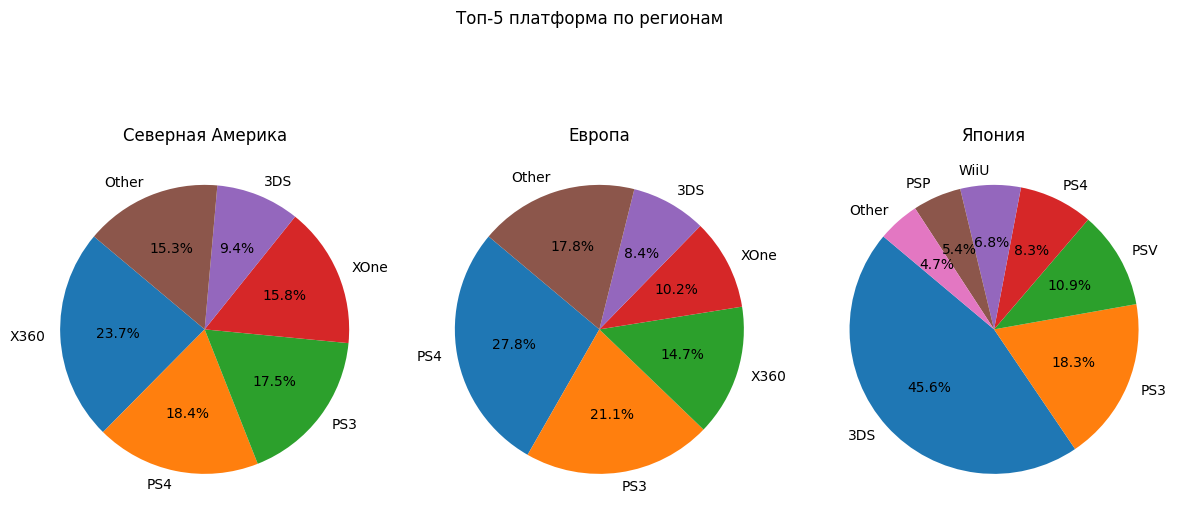

In [60]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.pie(na_sizes, labels=na_labels, autopct='%1.1f%%', startangle=140)
plt.title('Северная Америка')


plt.subplot(1, 3, 2)
plt.pie(eu_sizes, labels=eu_labels, autopct='%1.1f%%', startangle=140)
plt.title('Европа')

plt.subplot(1, 3, 3)
plt.pie(jp_sizes, labels=jp_labels, autopct='%1.1f%%', startangle=140)
plt.title('Япония')

plt.suptitle('Топ-5 платформа по регионам')


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


<b>Вывод</b>

- По рейтингу в топ-5 в америке входит X360, PS3, 3DS, PS4, XOne.
- По рейтингу в топ-5 в европе входит PS3, X360, PS4, XOne, 3DS.
- По рейтингу в топ-5 в япония входит 3DS, PS3, PSV, PS4, WiiU.

Из графиков можно сказать что PS4, X360 более популярна в америке и европа. В Япония популярны местные компании.
	

#### 4.2 Определите для пользователя каждого региона (NA, EU, JP):
  - Самые популярные жанры (топ-5). Поясните разницу.


In [61]:
na_genre_sales = pd.pivot_table(actual_games_df, index='genre', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_genre_sales

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19
Platform,25.38
Fighting,19.79
Racing,17.22
Adventure,8.92


In [62]:
eu_genre_sales = pd.pivot_table(actual_games_df, index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_genre_sales

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.08
Role-Playing,48.53
Racing,27.29
Misc,26.32
Platform,21.41
Simulation,14.55
Fighting,10.79


In [63]:
jp_genre_sales = pd.pivot_table(actual_games_df, index='genre', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_genre_sales

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44
Shooter,9.23
Platform,8.63
Adventure,8.24
Sports,8.01


In [64]:
jp_genre_labels, jp_genre_sizes = categorize_sales(jp_genre_sales,column='jp_sales', threshold=9)
na_genre_labels, na_genre_sizes = categorize_sales(na_genre_sales,column='na_sales', threshold=25)
eu_genre_labels, eu_genre_sizes = categorize_sales(eu_genre_sales,column='eu_sales', threshold=30)

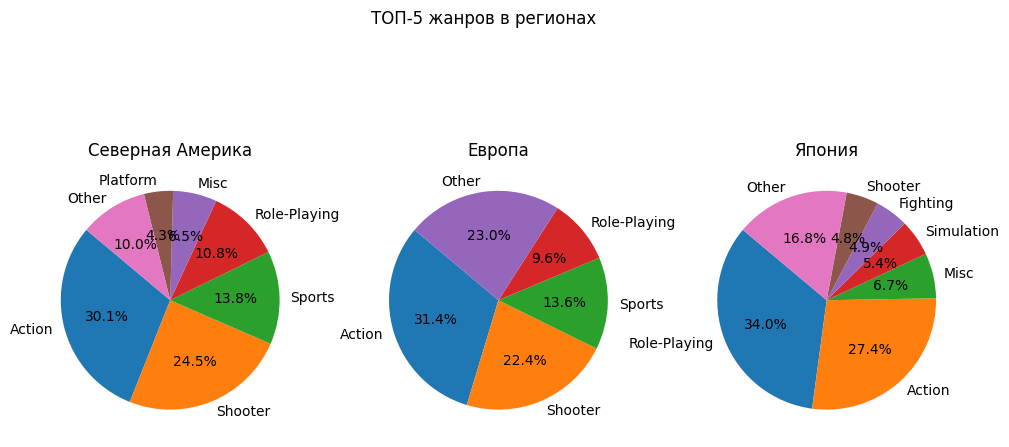

In [65]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.pie(na_genre_sizes, labels=na_genre_labels, autopct='%1.1f%%', startangle=140)
plt.title('Северная Америка')


plt.subplot(1, 3, 2)
plt.pie(eu_genre_sizes, labels=eu_genre_labels, autopct='%1.1f%%', startangle=140)
plt.title('Европа')

plt.subplot(1, 3, 3)
plt.pie(jp_genre_sizes, labels=jp_genre_labels, autopct='%1.1f%%', startangle=140)
plt.title('Япония')

plt.suptitle('ТОП-5 жанров в регионах')

plt.show()

<b>Вывод</b>

- По рейтингу в топ-5 в америке входит Action, Shooter, Sports, Misc, Role-Playing.
- По рейтингу в топ-5 в европе входит Action, Shooter, Sports, Role-Playing, Misc.
- По рейтингу в топ-5 в япония входит Role-Playing, Action, Misc, Platform, Adventure.

Из графиков можно сказать что  в америке и европа популярные жанры очень похожи. А в  Япония существенное различие популярность жанры чем америке и европа.

#### 4.3 Определите для пользователя каждого региона (NA, EU, JP):
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [66]:
esrb_sales = actual_games_df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
esrb_sales

,na_sales,eu_sales,jp_sales
rating,,,
E,114.37,113.02,28.33
E10+,75.70,55.37,8.19
M,231.57,193.96,21.20
T,66.02,52.96,26.02
unknown,103.31,91.50,108.84


<b>Вывод</b>

- В Северной Америке рейтинг "M" (Mature) имеет наибольшие продажи, за ним следуют "E" (Everyone) и "Unknown". Это может указывать на популярность игр для взрослой аудитории.
- В Европе ситуация аналогичная, хотя продажи игр с рейтингом "E" также довольно высоки.
- В Японии рейтинг "Unknown" имеет наибольшие продажи, что может говорить о большом количестве игр, не классифицированных по системе ESRB, либо о специфике японского рынка.

<b>Вывод</b>

- В Северная Америка и Европа игроки  любить играть на плаформа PS4 и X360 жанры action и shooter.
-  В Япония в основном игроки подростки они любить играть на платформы 3DS и PS3 и жанр специфике японского рынка.

# Шаг 5. Проверьте гипотезы

#### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Подготовим данные для проверкы гипотезы.

In [67]:
Xbox_One_user_rating = actual_games_df[actual_games_df['platform']=='XOne']['user_score'].dropna()
PC_user_rating = actual_games_df[actual_games_df['platform']=='PC']['user_score'].dropna()

In [68]:
platform_mean_ratings = actual_games_df.groupby('platform')['user_score'].mean().sort_values()

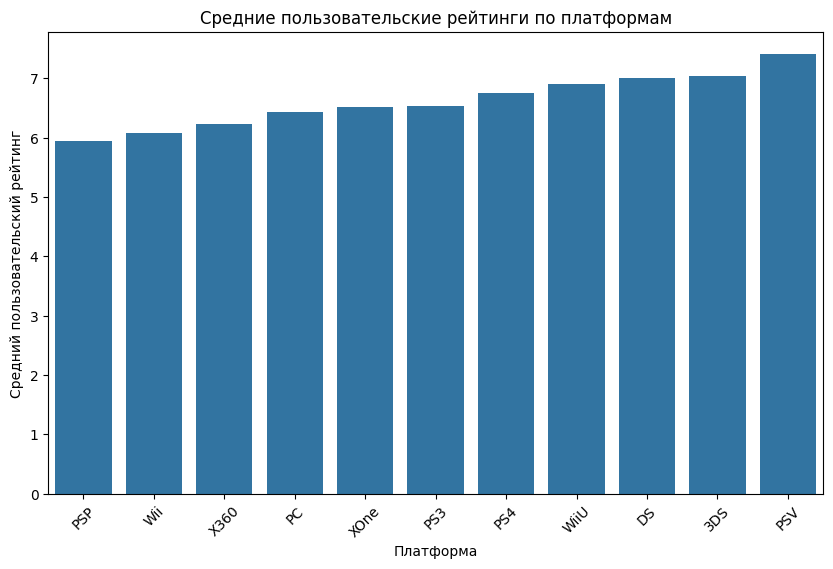

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_mean_ratings.index, y=platform_mean_ratings.values)
plt.title('Средние пользовательские рейтинги по платформам')
plt.xlabel('Платформа')
plt.ylabel('Средний пользовательский рейтинг')
plt.xticks(rotation=45)
plt.show()

Как вы сформулировали нулевую и альтернативную гипотезы:
- Для проверки гипотезы с помощью t-критерия мы вычисляем t-статистику и p-значение. Если p-значение меньше выбранного уровня значимости (обычно 0,05), мы отвергаем нулевую гипотезу в пользу альтернативной.

Какой критерий применили для проверки гипотез и почему:
- Рейтинги пользователей для платформ Xbox One и PC можно считать независимыми, поскольку они не зависят друг от друга.Для проверки гипотезы о равенстве средних пользовательских рейтингов для платформ Xbox One и PC, можно использовать t-критерий Стьюдента для независимых выборок. Этот критерий применяется, когда нужно сравнить средние значения двух независимых групп

- Нулевая гипотеза (H₀): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- Альтернативная гипотеза (H): Средние пользовательские рейтинги платформ Xbox One и PC различаются.

- alternative='two-sided'.

In [70]:

alpha = .05

results = st.ttest_ind(Xbox_One_user_rating, PC_user_rating, alternative='two-sided')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза подтверждает что рейтинги похожи друг на друга.

#### 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Подготовим данные для проверкы гипотезы.

In [71]:
Action_user_rating = actual_games_df[actual_games_df['genre'] == 'Action']['user_score'].dropna()
Sports_user_rating = actual_games_df[actual_games_df['genre'] == 'Sports']['user_score'].dropna()

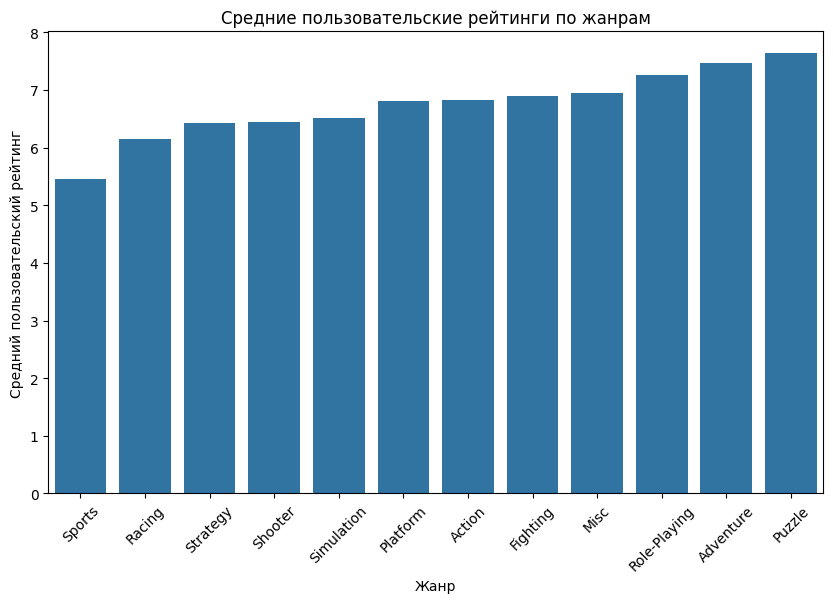

In [72]:
genre_mean_ratings = actual_games_df.groupby('genre')['user_score'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_mean_ratings.index, y=genre_mean_ratings.values)
plt.title('Средние пользовательские рейтинги по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Средний пользовательский рейтинг')
plt.xticks(rotation=45)
plt.show()

Как вы сформулировали нулевую и альтернативную гипотезы:
- Для проверки гипотезы с помощью t-критерия мы вычисляем t-статистику и p-значение. Если p-значение меньше выбранного уровня значимости (обычно 0,05), мы отвергаем нулевую гипотезу в пользу альтернативной.

Какой критерий применили для проверки гипотез и почему:
- Рейтинги пользователей для жанров Action и Sports можно считать независимыми, поскольку они не зависят друг от друга.Для проверки гипотезы о равенстве средних пользовательских рейтингов для жанров Action и Sports, можно использовать t-критерий Стьюдента для независимых выборок. Этот критерий применяется, когда нужно сравнить средние значения двух независимых групп

- Нулевая гипотеза (H₀): Средние пользовательские рейтинги жанров Action и Sports одинаковые.

- Альтернативная гипотеза (H): Средние пользовательские рейтинги жанров Action и Sports различаются.

- alternative='two-sided'.

In [73]:

alpha = .05

results = st.ttest_ind(Action_user_rating, Sports_user_rating, alternative='two-sided')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 4.8045233804629176e-26
Отвергаем нулевую гипотезу


p-value меньше 0.05, отвергаем нулевую гипотезу и заключаем, что рейтинги жанров разные.

<font color='DarkBlue'><b>Теория</b></font><br>
<font color='DarkMagenta'>👉 Вспоминаем спринт по Статистике.<br>
<p>    <b>Правила формулирования нулевой и альтернативной гипотез:</b><br>
- <i>Нулевая гипотеза (H0)</i> - это предположение о том, что нет различий между средними значениями двух выборок. В случае t-теста, нулевая гипотеза утверждает, что среднее значение разницы между двумя выборками равно нулю.<br>
- <i>Альтернативная гипотеза (H1)</i> - это противоположное предположение о том, что существуют различия между средними значениями двух выборок. В t-тесте альтернативная гипотеза утверждает, что среднее значение разницы между двумя выборками не равно нулю.</p>
<p><b>Использование t-теста имеет определенные ограничения, которые необходимо учитывать при его применении:</b><br>
- <i>Нормальное распределение данных:</i> t-тест предполагает, что данные имеют нормальное распределение. Если данные не соответствуют этому предположению, то результаты теста могут быть недостоверными. При выборках более 30 значений нормальность выборки не важна, с учетом того, что в реальных бизнес-процессах нормального распределения данных ни когда не бывает.<br>
- <i>Равномерное распределение данных в каждой группе:</i> t-тест предназначен для сравнения средних значений двух независимых выборок. Поэтому важно, чтобы в каждой группе (выборке) было достаточное количество наблюдений и они были равномерно распределены.<br>
- <i>Независимость выборок:</i> t-тест предполагает, что выборки, которые сравниваются, являются независимыми. Если наблюдения в одной выборке зависят от наблюдений в другой выборке (например, в случае последовательных временных точек), то необходимо использовать другие статистические методы.<br>
- <i>Достаточно большой размер выборки:</i> для получения достоверных результатов t-теста необходимо, чтобы размер каждой выборки был достаточно большим. Минимальные требования к размеру выборки зависят от уровня значимости.<br> 
- <i>Отсутствие выбросов:</i> t-тест чувствителен к выбросам в данных, поэтому важно убедиться, что в данных нет экстремальных значений, которые могут исказить результаты.<br>
- <i>Однородность дисперсий:</i> t-тест предполагает, что дисперсии (разбросы) данных в каждой выборке примерно одинаковы. Если это не так, то следует использовать параметр `equal_var` равным `False`.</p></font>

# Шаг 6. Напишите общий вывод

1. Обработка и анализ данных

  Мы начали с обработки данных, связанных с продажами компьютерных игр до 2016 года. Были произведены следующие шаги:

- Преобразование данных в нужные типы.
- Удалили пропущенных значений в столбцах genre, name и year_of_release.
- Заполнение пропущенных значений в столбце rating заглушкой типа 'Unknown'.

2. Анализ выпуска игр по годам

  Было выявлено, что наибольшее количество игр выпускалось в период с 2002 по 2016 годы. Именно эти данные были признаны актуальными для построения прогнозов на 2017 год.

3. Анализ продаж по платформам

  Мы проанализировали суммарные продажи по платформам и выявили, что такие платформы, как PS4, X360, PS3, XOne, являются лидерами по продажам. Построение графиков показало, что платформы сменяются примерно каждые 7 лет.

4. Выбор актуальных платформ

  Исходя из продаж в актуальный период (2012-2016 гг.), были выбраны потенциально прибыльные платформы: PS4, XOne, PS3 и X360. Эти платформы показали значительные продажи и рост.

5. Глобальные продажи игр

  Мы проанализировали глобальные продажи игр в разбивке по платформам и построили "ящик с усами" для визуализации распределения. Это помогло понять, что на платформах PS4, Wii X360 медианные значения продаж выше по сравнению с другими платформами.

6. Влияние оценок критиков и пользователей на продажи

  Анализ платформы PS4 показал, что корреляция между оценками критиков и продажами сильнее, чем между оценками пользователей и продажами. Это говорит о значительном влиянии мнений критиков на успех игр.

7. Распределение игр по жанрам

  Мы выявили, что жанры Platform, Shooter и Sports являются самыми устойчивыми прибыльными, тогда как жанры Adventure, Puzzle и Strategy имеют самые низкие продажи. Жанры с высокими продажами характеризуются динамичным геймплеем и широким интересом среди пользователей.

8. Региональные предпочтения

  Были выявлены различия в предпочтениях пользователей различных регионов:

- В Северной Америке и Европе наибольшие продажи имеют игры с рейтингом M (Mature).
- В Японии более популярны игры с рейтингом 'Unknown'.

9. Влияние рейтинга ESRB на продажи

  Анализ показал, что рейтинг ESRB существенно влияет на продажи в различных регионах. В Северной Америке и Европе наибольшие продажи у игр с рейтингом M, а в Японии лидируют игры с рейтингом 'Unknown' что можно сказать это связано с японской культурой.

10. Проверка гипотез
  Для проверки гипотез о средних пользовательских рейтингах:

- Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные.
  Использование независимого двухвыборочного t-теста показало:

- Cредние пользовательские рейтинги платформ Xbox One и PC одинокие (не получилосьотвергли H0).
- Средние пользовательские рейтинги жанров Action и Sports разные (отвергли H0).

Заключение

  Анализ данных о продажах компьютерных игр позволил сделать выводы, которые помогут в планировании рекламных кампаний и выборе платформ и жанров для будущих игр. Опираясь на выявленные закономерности и региональные предпочтения, можно разработать стратегии, направленные на максимизацию продаж и удовлетворение спроса в различных регионах.